## Lession 3: Regression

**Prepared by John C.S. Lui** 

Date: Feb 17, 2021.

## Introduction

In statistics, Lesson 1,  and in CSCI3320 lectures, we talked about using **best-fit** method, which is esssentially **ordinary least squares (OLS)** regression method.

The questions are, when we have **many** features, and when the number of features is more
than the data points, what can we do?  It turns out that scikit-learn can come to the 
rescue.  Let's explore this interesting and important topic.

## Predict house price

We want to predict house price in Boston, USA.  The data set has various
features such as demographic and geographical attributes, such as the crime rate or the pupil-teacher ratio in the neighborhood, ...etc.  The data set is a built-in data set in scikit-learn.


In [7]:
import numpy as np
from matplotlib import pyplot as plt

# So we can do plots inline:
%matplotlib inline   

# Load the dataset
from sklearn.datasets import load_boston
boston = load_boston() 

# boston.data contains the input data 
# boston.target contains the price of houses in thousands of dollars.

print(boston.DESCR)  # description of the data
print('\n*** Feature names are: ', boston.feature_names)
print('\n*** shape of data:', boston.data.shape)  # so we know how many input points

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

shape of x: (506,)
shape of y: (506,)
average housing price = $ 22532.806324110676
*** shape of x: (506, 1)
*** shape of y: (506, 1)
*** average housing price = $ 22532.806324110676


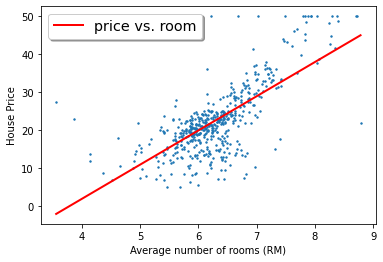

In [8]:
# Our first regression attempt

from sklearn.linear_model import LinearRegression
#lr = LinearRegression(fit_intercept=True)
lr = LinearRegression()

# Index number 5 in the number of rooms
x = boston.data[:, 5]  # array with average # of rooms in 506 sample points
y = boston.target      # array of target prices in 506 sample points

# illustrate the dimension of x and y
print('shape of x:', x.shape)  
print('shape of y:', y.shape)
print('average housing price = $', np.average(y)*1000)

# lr.fit takes a two-dimensional array as input. We use np.atleast_2d
# to convert from one to two dimensional, then transpose to make sure that the
# format matches:
x = np.transpose(np.atleast_2d(x))
y = np.transpose(np.atleast_2d(y))

print('*** shape of x:', x.shape)  
print('*** shape of y:', y.shape)
print('*** average housing price = $', np.average(y)*1000)

# perform linear regression fit
lr.fit(x, y)


#lr.predict(np.atleast_2d(xmin))

fig,ax = plt.subplots()  # enable plot
ax.set_xlabel("Average number of rooms (RM)")
ax.set_ylabel("House Price")
xmin = x.min()   # find out the minimum values of x
xmax = x.max()   # find out the maximum value of x

# find out the predicted  price at x_min and x_max
# Note that we have to convert it to 2d array, then get the integer value
# so to pass to the plotting routing
predict_at_xmin = int(lr.predict(np.atleast_2d(xmin)))  
predict_at_xmax = int(lr.predict(np.atleast_2d(xmax)))

# Do the plottting, with x values from [xmin, xmax]
# y values from [predict_at_xmin, predict_at_xmax]
# use line for the curve (or '-')
# line weight is 2, set the color of the line to red
ax.plot([xmin, xmax],
        [predict_at_xmin, predict_at_xmax], '-', lw=2, color="red", label='price vs. room')
ax.legend(loc='upper left', shadow=True, fontsize='x-large')
ax.scatter(x, y, s=2)  # s is a parameter to show intensity of dots
fig.savefig('Lesson03_Regression_Fig_01.png')

In [9]:
# If we just use room (RM) as a single feature to do regression,
# we want to quantify its error with the target value, let say, in mean sqaured error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, lr.predict(x))
print("Mean squared error (on training data): {:.3}".format(mse))

Mean squared error (on training data): 43.6


In [11]:
# Let's do Root Mean-squared Error
rmse = np.sqrt(mse)
print('RMSE (on training data): {}'.format(rmse))

RMSE (on training data): 6.603071389222561


### Usefulness of RMSE

RMSE is almost like the standard deviation. If the house prices are normally distributed,
then 95% of all data points are within +/- 2 standard deviation from the mean.
Since RMSE = 6.6, and the housing price is in unit of \$1,000.
That means the estimated price is different from the real price by, **at most**, by ~\$13,000.

## Coeficient of determination

One way to get a feel about our accuracy is to use **coefficient of determination** 
(or R2 score when we are using linear regression).  Which is defined as:
$$
1 - \frac{\sum_i \left( y_i - \hat{y}_i\right)^2}{\sum_i \left(y_i - \bar{y}\right)}
$$
where $y_i$ is the housing price of the $i^{th}$ sample point,
$\hat{y}_i$ is the estimated housing price of the $i^{th}$ sample point,
and $\bar{y}$ is the average housing price of all sample points.
If it is equal to 1, it means perfect prediction. The lower the value, the worse is the prediction.

In [12]:
from sklearn.metrics import r2_score
r2 = r2_score(y, lr.predict(x))
print("R2 (on training data): {:.4}".format(r2))

# Another way to get the coefficeint of determination
print('*** r2 score: {:.4}'.format(lr.score(x,y)))

R2 (on training data): 0.4835
*** r2 score: 0.4835


## Multi-dimensional regression

Let's consider how to use **ALL** the input variables to do regression.

In [13]:
x = boston.data   # now x contains all features
y = boston.target

print('*** shape of x:', x.shape)  
print('*** shape of y:', y.shape)

lr.fit(x,y)

mse = mean_squared_error(y, lr.predict(x))
print("Mean squared error (on training data): {:.3}".format(mse))
rmse = np.sqrt(mse)
print('RMSE (on training data): {}'.format(rmse))
r2 = r2_score(y, lr.predict(x))
print("R2 (on training data): {:.2}".format(r2))

*** shape of x: (506, 13)
*** shape of y: (506,)
Mean squared error (on training data): 21.9
RMSE (on training data): 4.679191295697281
R2 (on training data): 0.74


To see how well we do, we plot prediction vs. actual price.

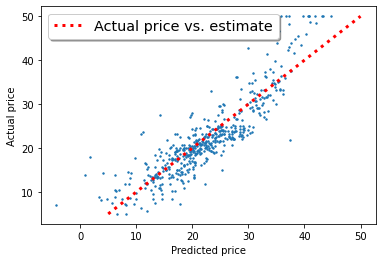

In [14]:
fig,ax = plt.subplots()
ax.set_xlabel('Predicted price')
ax.set_ylabel('Actual price')

# plot 45 degree line, which corresponds to *PERFECT* prediction
ax.plot([y.min(), y.max()], [y.min(), y.max()], ':', lw=3, color="red", label='Actual price vs. estimate')
ax.legend(loc='upper left', shadow=True, fontsize='x-large')
ax.scatter(lr.predict(x), y, s=2)
fig.savefig("Lesson03_Regression_Fig_02.png")

## Observations
1. We are quite accurate for *low* and *medium* range of house prices
2. Our model tends to **underestimate** for high-end houses

## Cross-validation

Now, we will use **cross-validation** for evaluating the regression quality:

In [15]:
# Use K-fold as cross validation
from sklearn.model_selection import KFold, cross_val_predict

num_fold = 5   # set K=5
kf = KFold(n_splits= num_fold) 
p = cross_val_predict(lr, x, y, cv=kf)  
rmse_cv = np.sqrt(mean_squared_error(p, y))
print('RMSE on 5-fold Cross-validation: {:.6}'.format(rmse_cv))

RMSE on 5-fold Cross-validation: 6.08959


## Results on cross-validation + KFold

We see that with cross-validation, we obtain a more _conservative_ estimate,
the RMSE is now ~6.1.

Note that the cross-validation estimate is a better estimate of how well we could **generalize** to predict on unseen data.

## Other regression models

Beside the linear regression model, there are other *minor derivatives*. In general,
they all **penalty** on the derived parameters to avoid overfitting. In other words,
we are willing to take worse prediction for the training data (but adding bias), but
we reduce on the variance and avoid overfitting.   So they can do a better job in generalization.
There are several simple penalty models, they are **Ridge**, **Lasso** and **ElasticNet**.

Let's step back and look at linear regression. In a nutshell, we do the following optimization:
$$
\mathbf{w}^* =  arg\, min_{\mathbf{w}} || \mathbf{y} - \mathbf{Xw}||^2
$$
In other words, find a vector $\mathbf{w}$ which can minimize the sum sqaured error.
So one can use the best find linear regression method we discussed in class to find 
$\mathbf{w}^*$.

**Ridge Regression model**: For Ridge, it adds a $L_2$ penalty to avoid overfitting.
$$
\mathbf{w}^* =  arg\, min_{\mathbf{w}} || \mathbf{y} - \mathbf{Xw}||^2 + \alpha \sum_i w_{i}^{2}
$$
In other words, we don't want each feature $i$ to have a very large weight $w_i$.  This can avoid a single
feature being a **dominating** feature and so it helps us in generalization (or avoid overfitting).

**Lasso Regression model**: For Lasso, it adds a $L_1$ penalty instead.  Its form is:
$$
\mathbf{w}^* =  arg\, min_{\mathbf{w}} || \mathbf{y} - \mathbf{Xw}||^2 + \alpha \sum_i |w_{i}|
$$
Note that Lasso has an **interesting property**, it will result with many feature weightings $w_i$ being zero.
This means that the final model does not even use some of its input features; the model is sparse. 
This is often a very desirable property as the model performs both feature selection and 
regression at the same time.

**ElasticNet**:  For the ElasticNet regression model, it adds **both** $L_1$ and $L_2$ norms as penalty.
$$
\mathbf{w}^* =  arg\, min_{\mathbf{w}} || \mathbf{y} - \mathbf{Xw}||^2 + \alpha_1 \sum_i |w_{i}| +
    \alpha_2 \sum_i w_{i}^{2}
$$

Obviously, $\alpha$, $\alpha_1$ and $\alpha_2$ are parameters to these models.  The higher the value
implies we care more about reducing the penalties.  When they are zero, all these models degenerate to the 
linear regression model.

## Using Linear, Ridgee, Lasso and ElasticNet regression models

Let's compare few different regression models on *both* training data and cross-validation*:

In [17]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge                              

# define the four regression models: LinearRegression, ElasticNet, Lasso, Ridge 
for name, met in [
        ('linear regression', LinearRegression()),
        ('ridge(.5)', Ridge(alpha=0.5)),
        ('lasso(.5)', Lasso(alpha=0.5)),
        ('elastic-net(.5)', ElasticNet(alpha=0.5))  ]:
    # Fit on the whole data:
    met.fit(x, y)

    # Predict on the whole data without cross-validation
    p = met.predict(x)
    r2_train = r2_score(y, p)   # r2 score when using all sample points for training

    kf = KFold(n_splits=5)  # use 5-fold
    p = np.zeros_like(y)    # define an array p w/c has same dimension as y, initialize it to zero
    for train, test in kf.split(x):    # loop through KFold
        met.fit(x[train], y[train])
        p[test] = met.predict(x[test])

    r2_cv = r2_score(y, p)   # get r2 score under cross-validation methods
    print('Method: {}'.format(name))
    print('R2 on training: {:.2}'.format(r2_train))
    print('R2 on 5-fold CV: {:.2}'.format(r2_cv))
    print('\n')
    
print('See how the Elastic-net has the best R2 score !!!!!!\n')

Method: linear regression
R2 on training: 0.74
R2 on 5-fold CV: 0.56


Method: ridge(.5)
R2 on training: 0.74
R2 on 5-fold CV: 0.58


Method: lasso(.5)
R2 on training: 0.71
R2 on 5-fold CV: 0.59


Method: elastic-net(.5)
R2 on training: 0.71
R2 on 5-fold CV: 0.64


See how the Elastic-net has the best R2 score !!!!!!



## Variation of weights for different features as we vary $\alpha$ in Lasso


Let's illustrate when we  varry $\alpha$ in Lasso, how will different weights of different features change

len(alphas):  1000 alphas[0 to 9]: [1.00000000e-05 1.01626509e-05 1.03279473e-05 1.04959323e-05
 1.06666496e-05 1.08401436e-05 1.10164595e-05 1.11956432e-05
 1.13777413e-05 1.15628013e-05]
---------------------------------------
len(alphas):  1000 alphas[0 to 9]: [100.          98.39952296  96.82466119  95.27500472  93.75015015
  92.24970053  90.77326525  89.32045999  87.89090653  86.48423276]
len(coefs):  13 coefs[0 to 13]: [[-0.         -0.         -0.         ... -0.09289523 -0.09289525
  -0.09289527]
 [ 0.02314768  0.02451811  0.02587159 ...  0.04871617  0.04871615
   0.04871613]
 [-0.         -0.         -0.         ... -0.0040841  -0.00408372
  -0.00408334]
 ...
 [ 0.          0.          0.         ... -0.39218309 -0.39218322
  -0.39218334]
 [ 0.0602122   0.06017372  0.06013569 ...  0.01490535  0.01490536
   0.01490536]
 [-0.         -0.         -0.         ... -0.41633143 -0.416331
  -0.41633057]]


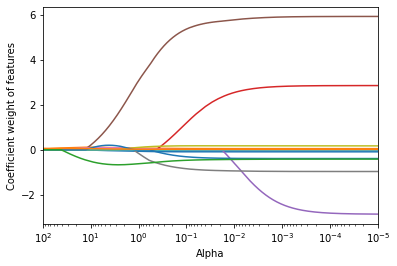

In [19]:

las = Lasso()
alphas = np.logspace(-5, 2, 1000)  
print('len(alphas): ', len(alphas), 'alphas[0 to 9]:', alphas[0:10])

# alphas contains all possible values of alphas, coefs contains the weighting
# for different feature for each alphas value
alphas, coefs, _= las.path(x, y, alphas=alphas)     

print('---------------------------------------')
print('len(alphas): ', len(alphas), 'alphas[0 to 9]:', alphas[0:10])
print('len(coefs): ', len(coefs), 'coefs[0 to 13]:', coefs[0:13])


fig,ax = plt.subplots()                             
ax.plot(alphas, coefs.T)                            
ax.set_xscale('log')      # remeber to set the x-axis as log scale                           
ax.set_xlim(alphas.max(), alphas.min())             


ax.set_xlabel('Lasso coefficient path as a function of alpha')                                           
ax.set_xlabel('Alpha')                              
ax.set_ylabel('Coefficient weight of features')                 
fig.savefig('Lesson03_Regression_Fig_03.png')

##  Hyperparameter

Now you may wonder, we have a tuning parameter $\alpha$ for Ridge and Lasso regression models, and $\alpha_1$
and $\alpha_2$ for ElasticNet.  So how should we set them correctly?  The dilemma is this:
* If these parameters are set too low, say close to zero, then these models becomes the linear regression
  model (which is like the ordinary least square fitting) and we have poor generation error (or we *overfit* 
  our model). 
* If these parameters are set too high, then all weights will return zero, then we *underfit* our model


## Setting hyperparameter the right way

It turns out that we can find the right parameteric values by using **two levels of cross-validation**.
The *top level* is to estimate the generalization power of the system, while the *second level* is to get good parameters.  For example, we have use the 2-level 5-fold split cross validation as follows:
![Drag Racing](Lesson03_Figure01.png)

When we are done with fold 1, we have to repeast the above procedure for fold 2 to fold 5. 

**Important point**: if you use any datapoint to make any decisions about your model (including which parameters to set), you can no longer use that same datapoint to test the generalization ability of your model. 


In [20]:
# Using ElasticNet with cross-validation to set the hyperparameter

from sklearn.linear_model import ElasticNetCV

met = ElasticNetCV()  # no need to specify the alpha value
kf = KFold(n_splits=5)
p = cross_val_predict(met, x, y, cv=kf) 
r2_cv = r2_score(y, p)
print("R2 Score for ElasticNetCV: {:.2}".format(r2_cv))


R2 Score for ElasticNetCV: 0.61


# L1 ratio in ElasticNet

You may wonder, in the ElasticNet, we have two parameters $\alpha_1$ and $\alpha_2$.  But for the 
ElasticNet example that we **first** used, we only specify the value of $\alpha$, so
how are $\alpha_1$ and $\alpha_2$ being set?

Internally, scikit-learn use the **L1 ratio** ($\rho$) to set both $\alpha_1$ and $\alpha_2$ as
$$
    \alpha_1 = \rho \alpha, \hspace{0.2in} \alpha_2 = (1-\rho)\alpha
$$
So $\rho$ can be viewed as a tradeoff knob between the $L_1$ and $L_2$ penalty terms.


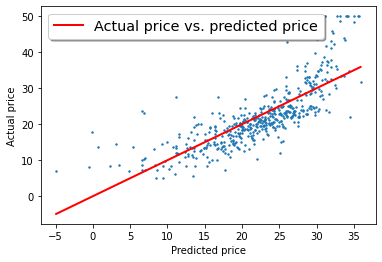

In [21]:
# Trying different L1 ratio ($\rho$) in ElasticNet

# Set different l1_ratio
l1_ratio = [.01, .05, .25, .5, .75, .95, .99]

met = ElasticNetCV(l1_ratio=l1_ratio, n_jobs=-1)  #n_jobs=-1 means use all CPU
pred = cross_val_predict(met, x, y, cv=kf) 
fig, ax = plt.subplots()
ax.scatter(pred, y, s=2)
# plot 45 degree line
ax.plot([pred.min(), pred.max()], [pred.min(), pred.max()], 
        '-', lw=2, color="red", label='Actual price vs. predicted price')
ax.set_xlabel('Predicted price')
ax.set_ylabel('Actual price')
ax.legend(loc='upper left', shadow=True, fontsize='x-large')



## E2006 Dataset  (THE FOLLOWING PROGRAMS WILL RUN A LONG LONG TIME  !!!!!!!)

**Load data**:
Since the data is large, **please to go to the data sub-directory and execute the script to download the data first**.

One **unique** thing about this data is that the **number of features** is **A LOT MORE THAN** the
**number of data points**.  This can cause a problem if we use all data for training. Let's illustrate.

In [25]:
from sklearn.datasets import load_svmlight_file
data, target = load_svmlight_file('data/E2006.train')  # load the E2006 training data

print('\n*** shape of data:', data.shape)
print('*** shape of target:', target.shape)


*** shape of data: (16087, 150360)
*** shape of target: (16087,)


Compute error on training data to demonstrate that we can obtain near perfect scores:

In [26]:
#  THIS WILL TAKE A LONG TIME, around one to two minutes on my laptop !!!!!
lr = LinearRegression()
lr.fit(data, target)
pred = lr.predict(data) 


print('RMSE on training, {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('R2 on training, {:.2}'.format(r2_score(target, pred)))

RMSE on training, 0.00053
R2 on training, 1.0


**Amazing result**. RMSE is almost zero and our R2 is perfect !!!!

However, when we do it with cross-validation, we will see that do not do so well on cross-validation:

In [27]:
#  THIS WILL TAKE A LONG TIME, around 4-5 mins !!!!!

# Let's try KFold cross validation
kf = KFold(n_splits=5)
pred = cross_val_predict(lr, data, target, cv=kf)


print('RMSE on testing (5 fold), {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('R2 on testing (5 fold), {:.2}'.format(r2_score(target, pred)))

RMSE on testing (5 fold), 0.75
R2 on testing (5 fold), -0.42


We got perfect result because we use ALL the data for training.

If we leave some data for testing or cross-validation, we see from above that we don't have a good result.

Now, we try an **Elastic net**:

In [28]:
# Edit the lines below if you want to switch method:                                                     
met = ElasticNet(alpha=0.1)
met.fit(data, target)
pred = met.predict(data)

print('[EN 0.1] RMSE on training: {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN 0.1] R2 on training: {:.2}'.format(r2_score(target, pred)))

[EN 0.1] RMSE on training: 0.4
[EN 0.1] R2 on training: 0.61


Not a perfect prediction on the training data anymore, but let us check the value on cross-validation:

In [29]:
pred = cross_val_predict(met, data, target, cv=kf)

print('[EN 0.1] RMSE on testing (5 fold): {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN 0.1] R2 on testing (5 fold): {:.2}'.format(r2_score(target, pred)))

[EN 0.1] RMSE on testing (5 fold): 0.4
[EN 0.1] R2 on testing (5 fold): 0.61


We now use **`ElasticNetCV`** to set parameters automatically:

In [ ]:
#  THIS WILL TAKE A LONG TIME !!!!!

from sklearn.linear_model import ElasticNetCV
# Construct an ElasticNetCV object (use all available CPUs)
met = ElasticNetCV(n_jobs=-1)

met.fit(data, target)
pred = met.predict(data)
print('[EN CV] RMSE on training, {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN CV] R2 on training, {:.2}'.format(r2_score(target, pred)))

pred = cross_val_predict(met, data, target, cv=kf)
print('[EN CV] RMSE on testing (5 fold), {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN CV] R2 on testing (5 fold), {:.2}'.format(r2_score(target, pred)))

[EN CV] RMSE on training, 0.37
[EN CV] R2 on training, 0.65


This is a a **pretty good general-purpose regression object**  !!!

Now let us try to find the right L1 ratio for the ElasticNet.

In [19]:
#  THIS WILL TAKE A LONG LONG LONG  TIME, around 2.5 hours !!!!!

# Construct an ElasticNetCV object (use all available CPUs)
met = ElasticNetCV(n_jobs=-1, l1_ratio=[.01, .05, .25, .5, .75, .95, .99])

pred = cross_val_predict(met, data, target, cv=kf)

print('[EN CV l1_ratio] RMSE on testing(5 fold), {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN CV l1_ratio] R2 on testing (5 fold), {:.2}'.format(r2_score(target, pred)))

[EN CV l1_ratio] RMSE on testing(5 fold), 0.37
[EN CV l1_ratio] R2 on testing (5 fold), 0.65


Now the final result:

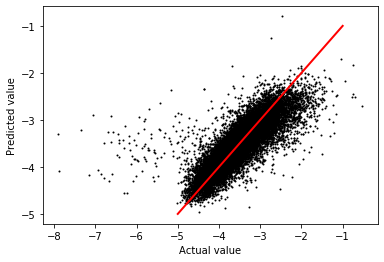

In [20]:
# Let's plot this result

fig, ax = plt.subplots()
ax.scatter(target, pred, c='k', s=1)
ax.plot([-5,-1], [-5,-1], 'r-', lw=2)
ax.set_xlabel('Actual value')
ax.set_ylabel('Predicted value')
fig.savefig('Lesson03_Regression_Fig_05.png')

## Conclusion

What we have learnt:
1. Single feature linear regression (or least square fit)
2. Multi-dimensional linear regeression
3. Regression using Ridge, Lasso and ElasticNet Model
4. Tunning hyperparameter
5. Illustrate the problem of not using cross-validation (or use **ALL DATA** for training).  
6. Illustrate how to use ElasticNet for regresion and how to use the L1 ratio to tune $\lambda_1$ and $\lambda_2$.

<br>
<span style="font-family:times; font-size:0.9em;">
p.s.: The above codes are the "modified" and "enhanced" version of the codes from the book, "Building Machine Learning Systems with Python".</span>